In [1]:
# imports

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.tools.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [30]:
data= pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


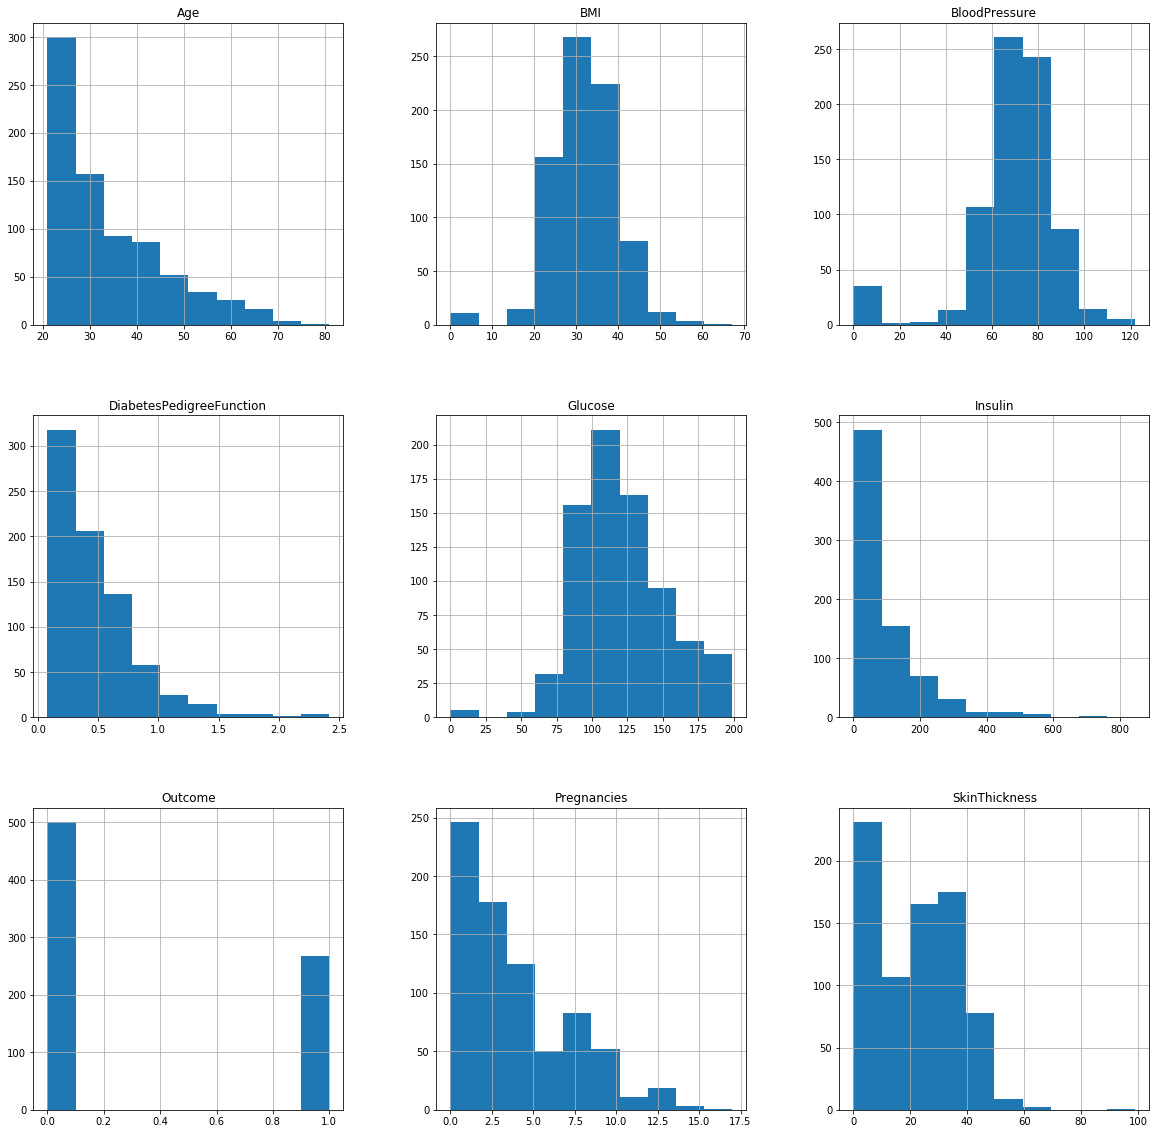

In [33]:
data.hist(figsize=(20,20))
plt.show()

** I am concerned with 0 min values for Glucose, blood pressure, skin thickness, insulim, BMI, i need to replace the 0 with NAN and then drop these NAN

In [34]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [35]:
data[data['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [36]:
#columnns= [c for c in data.columns if c not in ["Class"]]

In [37]:
columns= [c for c in data.columns if c not in ['Pregnancies','DiabetesPedigreeFunction','Age','Outcome']]

In [38]:
columns

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [39]:
for col in columns:
    data[col].replace(0,np.nan,inplace=True)

In [40]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [41]:
data=data.dropna(axis=0)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1
20,3,126.0,88.0,41.0,235.0,39.3,0.704,27,0


In [42]:
import seaborn as sns
corr=data.corr()

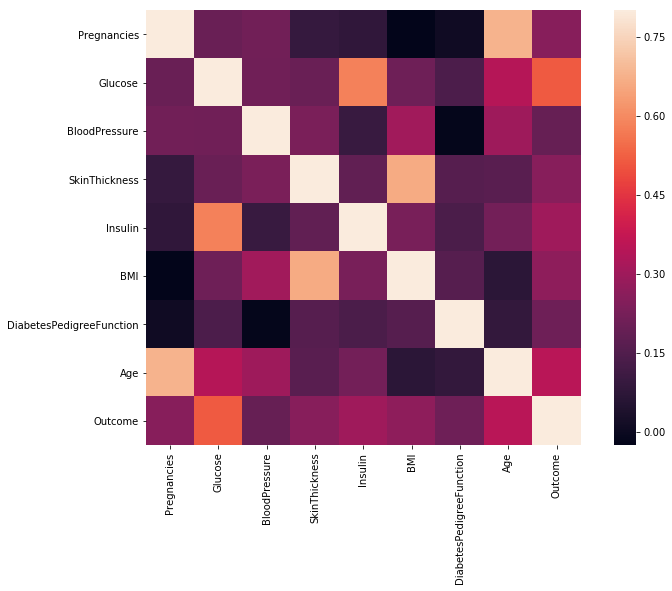

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(corr,vmax=0.8,square=True)

In [45]:
new_columnns= [c for c in data.columns if c not in ["Outcome"]]
new_columnns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [46]:
X=data[new_columnns]
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59


In [53]:
X=X.values

In [57]:
X.shape

(392, 8)

In [59]:
type(X)

numpy.ndarray

In [61]:
y= data['Outcome'].astype(int)
y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [62]:
type(y)

pandas.core.series.Series

In [63]:
y.shape

(392,)

In [64]:
# Normalize the data using sklearn StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)

In [65]:
# Transform and display the training data
X_standardized = scaler.transform(X)

final_data = pd.DataFrame(X_standardized)
final_data.describe()

,0,1,2,3,4,5,6,7
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-4.021726e-17,3.129583e-17,-4.641624e-16,1.042250e-16,6.485742e-17,1.543550e-16,3.880116e-17,1.028089e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.029213e+00,-2.161731e+00,-3.739001e+00,-2.108484e+00,-1.196867e+00,-2.120941e+00,-1.269525e+00,-9.682991e-01
25%,-7.174265e-01,-7.665958e-01,-6.941640e-01,-7.755315e-01,-6.681786e-01,-6.676780e-01,-7.340909e-01,-7.719850e-01
50%,-4.056403e-01,-1.176959e-01,-5.314565e-02,-1.384444e-02,-2.574448e-01,1.621036e-02,-2.131475e-01,-3.793569e-01
75%,5.297185e-01,6.609841e-01,5.878727e-01,7.478426e-01,2.859877e-01,5.718696e-01,4.751644e-01,5.040564e-01
max,4.271153e+00,2.445459e+00,3.151946e+00,3.223325e+00,5.812990e+00,4.846172e+00,5.497667e+00,4.921123e+00


In [70]:
final_data

,0,1,2,3,4,5,6,7
0,-0.717427,-1.091046,-0.373655,-0.585110,-0.522842,-0.710421,-1.031876,-0.968299
1,-1.029213,0.466314,-2.456964,0.557421,0.100631,1.426730,5.115111,0.209585
2,-0.093854,-1.447941,-1.655691,0.271788,-0.573394,-0.297238,-0.797126,-0.477514
3,-0.405640,2.413014,-0.053146,1.509530,3.260122,-0.368477,-1.057960,2.172726
4,-0.717427,2.153454,-0.854419,-0.585110,5.812990,-0.425468,-0.362402,2.761668
5,0.529718,1.407219,0.107109,-0.965953,0.159608,-1.038117,0.185349,1.976412
6,-1.029213,-0.150141,1.068636,1.699951,0.623000,1.811417,0.081015,0.013271
7,-0.717427,-0.636816,-3.258237,0.843053,-0.615520,1.455225,-0.985506,0.209585
8,-0.717427,-0.247476,-0.053146,0.081366,-0.505991,0.215678,0.017256,0.111428
9,-0.093854,0.109419,1.389146,1.128686,0.665127,0.885318,0.524433,-0.379357


In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model=LogisticRegression()

In [73]:
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
model.score(X,y)

0.7857142857142857

In [75]:
predicted= model.predict(X)
predicted

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0,

In [76]:
from sklearn.metrics import confusion_matrix

In [77]:
print(confusion_matrix(y,predicted))

[[237  25]
 [ 59  71]]


In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y,predicted)

0.7857142857142857

In [91]:
#import necessary sklearn and keras packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [87]:
input_dim = X.shape[1] 

In [88]:
input_dim

8

In [81]:
# Function to create model, required for KerasClassifier
def create_model():
    # default values
    activation='relu' # or linear
    dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    optimizer='adam' # or SGD
    lr = 0.01
    momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(8, 
                    input_dim=input_dim, kernel_initializer=init_mode, 
                    activation=activation,
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

In [82]:
 #create model
model = KerasClassifier(build_fn=create_model, batch_size=1000, epochs=10) 
# use verbose=0 if you do not want to see progress

In [83]:
########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'] # softmax, softplus, softsign 
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
weight_constraint=[1, 2, 3, 4, 5]
neurons = [1, 5, 10, 15, 20, 25, 30]
init = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [84]:
##############################################################
# grid search epochs, batch size
epochs = [1, 10] # add 50, 100, 150 etc
batch_size = [1000, 5000] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size)

In [92]:
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X, y) 

Epoch 1/1
Epoch 1/1
Epoch 1/1
Epoch 1/10
261/261 [==============================] - 0s - loss: 0.7017 - acc: 0.3563



Epoch 2/10
261/261 [==============================] - 0s - loss: 0.6930 - acc: 0.6973

261/261 [==============================] - 0sEpoch 3/10

261/261 [==============================] - 0s - loss: 0.6928 - acc: 0.6973


262/262 [==============================] - 0sEpoch 4/10

261/261 [==============================] - 0s - loss: 0.6926 - acc: 0.6973
Epoch 5/10
261/261 [==============================] - 0s - loss: 0.6924 - acc: 0.6973
Epoch 6/10
261/261 [==============================] - 0s - loss: 0.6922 - acc: 0.6973
Epoch 7/10
261/261 [==============================] - 0s - loss: 0.6920 - acc: 0.6973
Epoch 8/10
261/261 [==============================] - 0s - loss: 0.6918 - acc: 0.6973
Epoch 9/10
261/261 [==============================] - 0s - loss: 0.6916 - acc: 0.6973
Epoch 10/10
261/261 [==============================] - 0s
Epoch 1/10
Epoch 1/1
Epoch 1/10
Epoch 1/

In [93]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.668367 using {'batch_size': 1000, 'epochs': 1}
0.668367 (0.040922) with: {'batch_size': 1000, 'epochs': 1}
0.668367 (0.040922) with: {'batch_size': 1000, 'epochs': 10}
0.668367 (0.040922) with: {'batch_size': 5000, 'epochs': 1}
0.668367 (0.040922) with: {'batch_size': 5000, 'epochs': 10}


In [94]:
# generate predictions with optimal hyperparameters
y_pred = grid.predict(X_standardized)

392/392 [==============================] - 0s


In [95]:
print(y_pred.shape)

(392, 1)


In [96]:
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [98]:
#Generate a classification report
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y, y_pred))
print(classification_report(y, y_pred))

0.668367346939
             precision    recall  f1-score   support

          0       0.67      1.00      0.80       262
          1       0.00      0.00      0.00       130

avg / total       0.45      0.67      0.54       392



/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
